## The neural network

Ultimately, the meat of the project is predicting oil production from solely easting and northing. If we have how much oil will come out each point, there is a clear approach to figuring out where the optimal 10 wells should be placed. There are a number of approaches to this, but we ultimately chose to use a neural network. This section will be a walkthrough of the thought process behind developing the neural network.

The first decision involving the neural network was what machine learning library to use. We chose Keras, particularly the TensorFlow implementation, because it makes it incredibly easy to create a basic sequential model. Since the ultimate goal was to predict oil production from two features, this was all we needed.

In [1]:
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random

The first step to building the neural network was to get some context around how good of a job we could do with the training. To do this, we just created a neural network, and trained it with more features than we will end up using in the end. To begin, we will load the OOIP data for each well.

In [2]:
calcs = pd.read_csv('calculations.csv')
calcs

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05,28920.062343
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04,924.778262
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06,122174.025375
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05,9858.100072
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05,72551.465885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tribal 14-4H.csv,12900.0,79389.72,8579.0,54.119562,0.0814,0.02966,0.074205,7.178213e+06,0.925795,0.31488,36454201,0.102102,7.968262e+06,247.592949,101.736233,81.017334,91.376784,1.807004e+06,184499.495268
96,Tribal 2-17H.csv,18500.0,26993.19,5586.0,61.629917,0.0518,0.01107,0.149344,1.170635e+07,0.850656,0.33808,36269180,0.107993,1.321703e+07,169.120199,45.343999,36.129351,40.736675,5.364021e+05,57927.876495
97,Tribal 4-215H.csv,36900.0,87154.27,11309.0,41.954475,0.0639,0.01792,0.098403,1.060412e+07,0.901597,0.30187,34518701,0.102955,1.166731e+07,124.125748,65.426788,51.730711,58.578750,6.865331e+05,70681.782337
98,Tribal 6-134H.csv,5100.0,14239.81,4680.0,4.505779,0.0492,0.01048,0.215824,6.513093e+06,0.784176,0.34424,35955602,0.085654,7.388658e+06,21.926580,4.736385,3.735075,4.235730,3.570313e+03,305.811816


Train on 4400 samples, validate on 5600 samples
Epoch 1/100
4400/4400 [==============================] - 1s 124us/sample - loss: 0.0263 - val_loss: 0.0143
Epoch 2/100
4400/4400 [==============================] - 0s 80us/sample - loss: 0.0070 - val_loss: 0.0158
Epoch 3/100
4400/4400 [==============================] - 0s 81us/sample - loss: 0.0067 - val_loss: 0.0226
Epoch 4/100
4400/4400 [==============================] - 0s 63us/sample - loss: 0.0069 - val_loss: 0.0234
Epoch 5/100
4400/4400 [==============================] - 0s 82us/sample - loss: 0.0067 - val_loss: 0.0190
Epoch 6/100
4400/4400 [==============================] - 0s 77us/sample - loss: 0.0068 - val_loss: 0.0158
Epoch 7/100
4400/4400 [==============================] - 0s 66us/sample - loss: 0.0067 - val_loss: 0.0141
Epoch 8/100
4400/4400 [==============================] - 0s 78us/sample - loss: 0.0068 - val_loss: 0.0147
Epoch 9/100
4400/4400 [==============================] - 0s 107us/sample - loss: 0.0066 - val_loss: 0.0

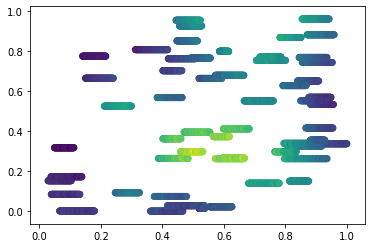

In [3]:
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


Now we have a good idea of what generally our final result should look like, but this one is more accurate. Earlier, we saw that porosity and permeability are the two features that have the most effect on the presence of oil. The higher both of these values are, the more oil there is, so we can likely reduce the 9 features being trained over to just northing, easting, porosity and permeability. Next, we will train over these four features to see how it compares to all 9 features.

Train on 5400 samples, validate on 4600 samples
Epoch 1/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.0438 - val_loss: 0.0425
Epoch 2/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0394 - val_loss: 0.0456
Epoch 3/100
5400/5400 [==============================] - 0s 73us/sample - loss: 0.0392 - val_loss: 0.0419
Epoch 4/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.0390 - val_loss: 0.0413
Epoch 5/100
5400/5400 [==============================] - 0s 69us/sample - loss: 0.0393 - val_loss: 0.0431
Epoch 6/100
5400/5400 [==============================] - 0s 72us/sample - loss: 0.0391 - val_loss: 0.0427
Epoch 7/100
5400/5400 [==============================] - 0s 70us/sample - loss: 0.0388 - val_loss: 0.0418
Epoch 8/100
5400/5400 [==============================] - 0s 52us/sample - loss: 0.0389 - val_loss: 0.0424
Epoch 9/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0388 - val_loss: 0.041

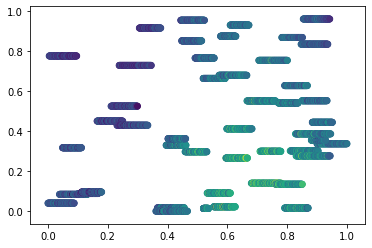

In [4]:
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()

# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[5,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


Finally, we can compare this result to what happens if we only train over easting and northing.

Train on 4200 samples, validate on 5800 samples
Epoch 1/100
4200/4200 [==============================] - 0s 110us/sample - loss: 0.0692 - val_loss: 0.0498
Epoch 2/100
4200/4200 [==============================] - 0s 79us/sample - loss: 0.0549 - val_loss: 0.0572
Epoch 3/100
4200/4200 [==============================] - 0s 83us/sample - loss: 0.0547 - val_loss: 0.0604
Epoch 4/100
4200/4200 [==============================] - 0s 80us/sample - loss: 0.0547 - val_loss: 0.0553
Epoch 5/100
4200/4200 [==============================] - 0s 81us/sample - loss: 0.0544 - val_loss: 0.0498
Epoch 6/100
4200/4200 [==============================] - 0s 98us/sample - loss: 0.0550 - val_loss: 0.0443
Epoch 7/100
4200/4200 [==============================] - 0s 67us/sample - loss: 0.0544 - val_loss: 0.0488
Epoch 8/100
4200/4200 [==============================] - 0s 67us/sample - loss: 0.0546 - val_loss: 0.0531
Epoch 9/100
4200/4200 [==============================] - 0s 63us/sample - loss: 0.0544 - val_loss: 0.06

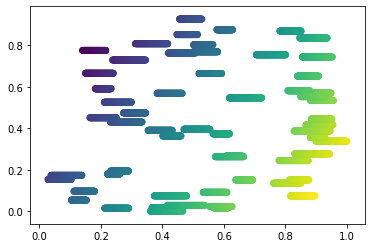

In [5]:
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_test = X_test[['easting', 'northing', 'original oil in place']]

# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


The fact that this performs significantly worse than both of the above networks indicates that ideally, we somehow include all of these features, but we must somehow only have easting and northing as inputs. To solve this, we can create models that predict each of these features based on easting and northing, and then plug all of these models, including easting and northing, as inputs into the final neural network that predicts the original oil in place.

In [9]:
def predict_feature(feature, opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', feature]]
    X_test = X_test[['easting', 'northing', feature]]

# separates our dependent variable out
    y_train = X_train.pop(feature)
    y_test = X_test.pop(feature)

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])

    return model

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

porosity = predict_feature('porosity', optimizer, .5, 100, 10, 10, 10, 5)
permeability = predict_feature('permeability', optimizer, .5, 100, 10, 10, 10, 5)
poisson = predict_feature("Poisson's ratio", optimizer, .5, 100, 10, 10, 10, 5)
young = predict_feature("Young's Modulus", optimizer, .5, 100, 10, 10, 10, 5)
oil_saturation = predict_feature('oil saturation', optimizer, .5, 100, 10, 10, 10, 5)
thickness = predict_feature('thickness (ft)', optimizer, .5, 100, 10, 10, 10, 5)


Train on 5100 samples, validate on 4900 samples
Epoch 1/100
5100/5100 [==============================] - 0s 71us/sample - loss: 0.0288 - val_loss: 0.0181
Epoch 2/100
5100/5100 [==============================] - 0s 71us/sample - loss: 0.0185 - val_loss: 0.0181
Epoch 3/100
5100/5100 [==============================] - 0s 56us/sample - loss: 0.0187 - val_loss: 0.0179
Epoch 4/100
5100/5100 [==============================] - 0s 55us/sample - loss: 0.0186 - val_loss: 0.0185
Epoch 5/100
5100/5100 [==============================] - 0s 55us/sample - loss: 0.0186 - val_loss: 0.0187
Epoch 6/100
5100/5100 [==============================] - 0s 74us/sample - loss: 0.0186 - val_loss: 0.0190
Epoch 7/100
5100/5100 [==============================] - 0s 55us/sample - loss: 0.0189 - val_loss: 0.0197
Epoch 8/100
5100/5100 [==============================] - 0s 55us/sample - loss: 0.0185 - val_loss: 0.0190
Epoch 9/100
5100/5100 [==============================] - 0s 55us/sample - loss: 0.0186 - val_loss: 0.018

5500/5500 [==============================] - 0s 55us/sample - loss: 0.0858 - val_loss: 0.0583
Epoch 11/100
5500/5500 [==============================] - 0s 58us/sample - loss: 0.0852 - val_loss: 0.0607


     easting  northing  permeability  porosity   poisson     young  \
0   0.875779  0.569926      0.598882  0.627512  0.116950  0.122018   
1   0.876507  0.569926      0.599206  0.627874  0.116271  0.121354   
2   0.877245  0.569926      0.599534  0.628241  0.115584  0.120680   
3   0.877973  0.569926      0.599858  0.628603  0.114906  0.120017   
4   0.878702  0.569926      0.600182  0.628964  0.114227  0.119352   
..       ...       ...           ...       ...       ...       ...   
95  0.236679  0.665615      0.244783  0.245247  0.699969  0.691172   
96  0.237594  0.665615      0.245190  0.245702  0.699117  0.690337   
97  0.238509  0.665615      0.245597  0.246157  0.698264  0.689501   
98  0.239425  0.665615      0.246005  0.246611  0.697412  0.688666   
99  0.240340  0.665615      0.246412  0.247066  0.696559  0.687830   

    oil saturation  thickness  
0         0.719094   0.875780  
1         0.719408   0.876438  
2         0.719727   0.877106  
3         0.720042   0.877765  

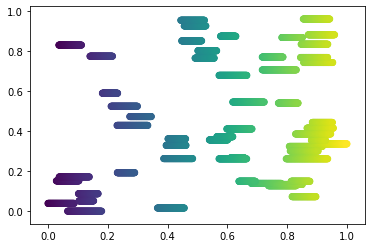

In [10]:
# this one trains on the predicted permeability and porosity from the models

def all_features_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_train['permeability'] = permeability.predict(X_train[['easting', 'northing']])
    X_train['porosity'] = porosity.predict(X_train[['easting', 'northing']])
    X_train['poisson'] = poisson.predict(X_train[['easting', 'northing']])
    X_train['young'] = young.predict(X_train[['easting', 'northing']])
    X_train['oil saturation'] = oil_saturation.predict(X_train[['easting', 'northing']])
    X_train['thickness'] = thickness.predict(X_train[['easting', 'northing']])
    
    X_test = X_test[['easting', 'northing', 'original oil in place']]
    X_test['permeability'] = permeability.predict(X_test[['easting', 'northing']])
    X_test['porosity'] = porosity.predict(X_test[['easting', 'northing']])
    X_test['poisson'] = poisson.predict(X_test[['easting', 'northing']])
    X_test['young'] = young.predict(X_test[['easting', 'northing']])
    X_test['oil saturation'] = oil_saturation.predict(X_test[['easting', 'northing']])
    X_test['thickness'] = thickness.predict(X_test[['easting', 'northing']])
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())
    
    print(X_train)

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[8,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

all_features_model(optimizer, .5, 100, 10, 10, 10, 5)


     easting  northing  permeability  porosity
0   0.182021  0.590957      0.274833  0.268652
1   0.182530  0.590957      0.275060  0.268905
2   0.183050  0.590957      0.275292  0.269163
3   0.183560  0.590957      0.275518  0.269417
4   0.184080  0.590957      0.275750  0.269675
..       ...       ...           ...       ...
95  0.615885  0.373291      0.626436  0.631566
96  0.616426  0.373291      0.626677  0.631834
97  0.616966  0.373291      0.626918  0.632103
98  0.617507  0.373291      0.627158  0.632372
99  0.618038  0.373291      0.627394  0.632635

[4800 rows x 4 columns]
Train on 4800 samples, validate on 5200 samples
Epoch 1/100
4800/4800 [==============================] - 1s 117us/sample - loss: 0.0687 - val_loss: 0.0364
Epoch 2/100
4800/4800 [==============================] - 0s 71us/sample - loss: 0.0628 - val_loss: 0.0357
Epoch 3/100
4800/4800 [==============================] - 0s 78us/sample - loss: 0.0632 - val_loss: 0.0409
Epoch 4/100
4800/4800 [=====================

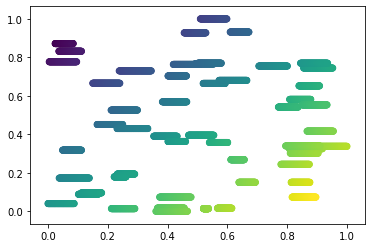

In [15]:
# this one trains on the predicted permeability and porosity from the models

def four_features_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_train['permeability'] = permeability.predict(X_train[['easting', 'northing']])
    X_train['porosity'] = porosity.predict(X_train[['easting', 'northing']])
    
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']]
    X_test['permeability'] = permeability.predict(X_test[['easting', 'northing']])
    X_test['porosity'] = porosity.predict(X_test[['easting', 'northing']])
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())
    
    print(X_train)

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[4,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

four_features_model(optimizer, .5, 100, 10, 10, 10, 5)


The bottom model has lower error compared to using all features, so we will use this one. Now we can train on the whole dataset, which will allow us to make predictions on new data.

In [19]:
# this one trains on the predicted permeability and porosity from the models

def four_features_model_final(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_train['permeability'] = permeability.predict(X_train[['easting', 'northing']])
    X_train['porosity'] = porosity.predict(X_train[['easting', 'northing']])
        
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    
    #normalize
    X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
    
    y_train = (y_train - y_train.min())/(y_train.max() - y_train.min())

    # sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[4,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, callbacks=[early_stopping])
    
    return model

model = four_features_model_final(optimizer, .5, 100, 10, 10, 10, 5)


Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 0s 45us/sample - loss: 0.0695
Epoch 2/100
5000/5000 [==============================] - 0s 57us/sample - loss: 0.0546
Epoch 3/100
5000/5000 [==============================] - 0s 49us/sample - loss: 0.0544
Epoch 4/100
5000/5000 [==============================] - 0s 36us/sample - loss: 0.0542
Epoch 5/100
5000/5000 [==============================] - 0s 40us/sample - loss: 0.0549
Epoch 6/100
5000/5000 [==============================] - 0s 38us/sample - loss: 0.0545
Epoch 7/100
5000/5000 [==============================] - 0s 42us/sample - loss: 0.0548
Epoch 8/100
5000/5000 [==============================] - 0s 48us/sample - loss: 0.0544
Epoch 9/100
5000/5000 [==============================] - 0s 45us/sample - loss: 0.0548
Epoch 10/100
5000/5000 [==============================] - 0s 43us/sample - loss: 0.0542
Epoch 11/100
5000/5000 [==============================] - 0s 39us/sample - loss: 0.0544
